In [41]:
import pandas as pd
import csv

In [42]:
#load the data
reviews_path = "../../sentiment_analysis/reviews_Indianapolis_analyzed.csv"
reviews_df = pd.read_csv(reviews_path, encoding='utf-8')
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,Very Positive,2015-08-19 14:31:45
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,Positive,2018-07-17 03:30:07
2,EoN2xyKvTTn9B-z1grhYxw,DBYhpb5hrAYgQjQaMhNYyQ,oJ4ik-4PZe6gexxW-tSmsw,4.0,0,0,0,Neutral,2016-10-26 15:29:56
3,Ti6y48ya3syOndm7teSjcg,NGTzj_44YDnPDmsD45HWeg,O8BBn8lry8lLoIFmChceGg,5.0,0,0,0,Positive,2014-08-10 23:56:17
4,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5.0,2,0,1,Positive,2018-01-10 01:48:58


In [43]:
# load raw data
raw_reviews_path = "../../city_filter/reviews_Indianapolis.csv"
raw_reviews_df = pd.read_csv(raw_reviews_path, encoding='utf-8')
raw_reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
2,EoN2xyKvTTn9B-z1grhYxw,DBYhpb5hrAYgQjQaMhNYyQ,oJ4ik-4PZe6gexxW-tSmsw,4.0,0,0,0,I love the Brewpub for their variety of dishes...,2016-10-26 15:29:56
3,Ti6y48ya3syOndm7teSjcg,NGTzj_44YDnPDmsD45HWeg,O8BBn8lry8lLoIFmChceGg,5.0,0,0,0,I stopped here because it was by the hotel I w...,2014-08-10 23:56:17
4,940tqxFO4Pwg_KMg4Y4Z5g,O6wkgoJqU7KMjleSlCDGaA,EQ-TZ2eeD_E0BHuvoaeG5Q,5.0,2,0,1,Milktooth is the place to go if you want a goo...,2018-01-10 01:48:58


In [44]:
business_path = '../business_features_engineering/businesses_Indianapolis_features.csv'
business_df = pd.read_csv(business_path, encoding='utf-8')
business_df

,business_id,stars,review_count,attr_score,cat_score
0,il_Ro8jwPlHresjw9EGmBg,-1.132288,-0.212222,6.5,1.670499
1,qhDdDeI3K4jy2KyzwFN53w,0.383586,-0.121393,0.0,1.000000
2,kfNv-JZpuN6TVNSO6hHdkw,0.383586,-0.284884,2.5,1.000000
3,x1mhq4IpWctQOBM06dU8vg,-2.142871,-0.239470,0.5,1.692475
4,seKihQKpGGnCeLuELRQPSQ,-0.121706,1.867748,5.5,2.185136
...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,-0.121706,-0.066896,NaN,NaN
5331,AM7O0cwkxm6w_e0Q7-f9FQ,0.383586,-0.203139,NaN,NaN
5332,Gi1QPLu_y8rLS3uTN9Z_VA,-0.626997,-0.357547,NaN,NaN
5333,fn3ybdsRSrIDpKZTsRuAWg,0.383586,-0.357547,NaN,NaN


In [45]:
business_review_feature_df = pd.DataFrame()
business_review_feature_df['business_id'] = business_df['business_id']

## 1. 基础评分类特征

In [46]:
review_star_stats = reviews_df.groupby("business_id")["stars"].agg(
    avg_review_stars='mean',
    std_review_stars='std'
).reset_index()

# 2. 与已筛选商家对齐（只保留出现在 business_df 中的）
business_review_feature_df = business_df[["business_id"]].merge(
    review_star_stats,
    on="business_id",
    how="left"
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
business_review_feature_df["std_review_stars_scaled"] = scaler.fit_transform(
    business_review_feature_df[["std_review_stars"]]
)

# 去掉std_review_stars
business_review_feature_df = business_review_feature_df.drop(
    columns=["std_review_stars"]
)

business_review_feature_df

,business_id,avg_review_stars,std_review_stars_scaled
0,il_Ro8jwPlHresjw9EGmBg,2.413793,0.776556
1,qhDdDeI3K4jy2KyzwFN53w,4.052632,-0.294102
2,kfNv-JZpuN6TVNSO6hHdkw,3.950000,0.515631
3,x1mhq4IpWctQOBM06dU8vg,1.600000,0.036412
4,seKihQKpGGnCeLuELRQPSQ,3.333333,0.525084
...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,3.346939,0.496569
5331,AM7O0cwkxm6w_e0Q7-f9FQ,3.866667,0.558162
5332,Gi1QPLu_y8rLS3uTN9Z_VA,3.083333,1.526495
5333,fn3ybdsRSrIDpKZTsRuAWg,4.083333,0.853708


## 2. 提取情感特征

In [47]:
# 统计每个商家每种情感的数量
sentiment_counts = reviews_df.groupby(["business_id", "text"]).size().unstack(fill_value=0)

# 确保每个标签都有列（防止某些标签在某些商家下缺失）
for col in ['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']:
    if col not in sentiment_counts.columns:
        sentiment_counts[col] = 0

# 计算总数
sentiment_counts["total"] = sentiment_counts.sum(axis=1)

# 计算比例（注意强制归一化）
sentiment_counts["pos_review_ratio"] = (
    sentiment_counts["Positive"] + sentiment_counts["Very Positive"]
) / sentiment_counts["total"]

sentiment_counts["neg_review_ratio"] = (
    sentiment_counts["Negative"] + sentiment_counts["Very Negative"]
) / sentiment_counts["total"]

sentiment_counts["neu_review_ratio"] = (
    sentiment_counts["Neutral"]
) / sentiment_counts["total"]

# sentiment_score_mean 仍然从映射字段中计算
reviews_df["sentiment_score"] = reviews_df["text"].map({
    'Very Negative': -2,
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1,
    'Very Positive': 2
})
score_mean = reviews_df.groupby("business_id")["sentiment_score"].mean()

# 合并两个部分
sentiment_stats = sentiment_counts[["pos_review_ratio", "neg_review_ratio", "neu_review_ratio"]].copy()
sentiment_stats["sentiment_score_mean"] = score_mean

# 重置索引准备合并
sentiment_stats = sentiment_stats.reset_index()

# 合并进主表
business_review_feature_df = business_review_feature_df.merge(
    sentiment_stats, on="business_id", how="left"
)

# 缺失填充
business_review_feature_df.fillna({
    "sentiment_score_mean": 0,
    "pos_review_ratio": 0,
    "neg_review_ratio": 0,
    "neu_review_ratio": 0
}, inplace=True)

business_review_feature_df


,business_id,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,sentiment_score_mean
0,il_Ro8jwPlHresjw9EGmBg,2.413793,0.776556,0.448276,0.379310,0.172414,-0.034483
1,qhDdDeI3K4jy2KyzwFN53w,4.052632,-0.294102,0.605263,0.078947,0.315789,0.736842
2,kfNv-JZpuN6TVNSO6hHdkw,3.950000,0.515631,0.750000,0.100000,0.150000,0.850000
3,x1mhq4IpWctQOBM06dU8vg,1.600000,0.036412,0.280000,0.600000,0.120000,-0.760000
4,seKihQKpGGnCeLuELRQPSQ,3.333333,0.525084,0.518519,0.211111,0.270370,0.444444
...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,3.346939,0.496569,0.428571,0.265306,0.306122,0.285714
5331,AM7O0cwkxm6w_e0Q7-f9FQ,3.866667,0.558162,0.633333,0.233333,0.133333,0.766667
5332,Gi1QPLu_y8rLS3uTN9Z_VA,3.083333,1.526495,0.500000,0.500000,0.000000,0.083333
5333,fn3ybdsRSrIDpKZTsRuAWg,4.083333,0.853708,0.750000,0.250000,0.000000,0.916667


## 3.评论文本类特征


In [48]:
# 添加文本长度、词数和长文本标记
raw_reviews_df["review_length"] = raw_reviews_df["text"].str.len()
raw_reviews_df["word_count"] = raw_reviews_df["text"].str.split().apply(len)
raw_reviews_df["is_long_review"] = (raw_reviews_df["review_length"] > 300).astype(int)

# 互动分数
raw_reviews_df["interact_score"] = (
    raw_reviews_df["useful"] + 0.5 * raw_reviews_df["funny"] + 0.2 * raw_reviews_df["cool"]
)  # 信息价值 > 认可感 > 娱乐性

# 按 business_id 聚合
length_interact_stats = raw_reviews_df.groupby("business_id").agg(
    avg_review_length=("review_length", "mean"),
    avg_word_count=("word_count", "mean"),
    long_review_ratio=("is_long_review", "mean"),
    avg_useful=("useful", "mean"),
    avg_funny=("funny", "mean"),
    avg_cool=("cool", "mean"),
    interact_score_mean=("interact_score", "mean")
).reset_index()

# 合并到主表
business_review_feature_df = business_review_feature_df.merge(
    length_interact_stats, on="business_id", how="left"
)

# 缺失填充（无评论的商家）
business_review_feature_df.fillna({
    "avg_review_length": 0,
    "avg_word_count": 0,
    "long_review_ratio": 0,
    "avg_useful": 0,
    "avg_funny": 0,
    "avg_cool": 0,
    "interact_score_mean": 0
}, inplace=True)
business_review_feature_df

,business_id,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,sentiment_score_mean,avg_review_length,avg_word_count,long_review_ratio,avg_useful,avg_funny,avg_cool,interact_score_mean
0,il_Ro8jwPlHresjw9EGmBg,2.413793,0.776556,0.448276,0.379310,0.172414,-0.034483,425.896552,79.137931,0.517241,0.655172,0.137931,0.482759,0.820690
1,qhDdDeI3K4jy2KyzwFN53w,4.052632,-0.294102,0.605263,0.078947,0.315789,0.736842,604.236842,112.868421,0.763158,1.789474,0.605263,1.394737,2.371053
2,kfNv-JZpuN6TVNSO6hHdkw,3.950000,0.515631,0.750000,0.100000,0.150000,0.850000,439.400000,84.400000,0.650000,1.000000,0.050000,0.200000,1.065000
3,x1mhq4IpWctQOBM06dU8vg,1.600000,0.036412,0.280000,0.600000,0.120000,-0.760000,788.040000,146.240000,0.840000,3.080000,0.120000,0.080000,3.156000
4,seKihQKpGGnCeLuELRQPSQ,3.333333,0.525084,0.518519,0.211111,0.270370,0.444444,544.422222,101.851852,0.533333,0.696296,0.322222,0.277778,0.912963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,3.346939,0.496569,0.428571,0.265306,0.306122,0.285714,505.530612,95.285714,0.612245,0.632653,0.122449,0.367347,0.767347
5331,AM7O0cwkxm6w_e0Q7-f9FQ,3.866667,0.558162,0.633333,0.233333,0.133333,0.766667,462.266667,86.433333,0.566667,0.733333,0.233333,0.233333,0.896667
5332,Gi1QPLu_y8rLS3uTN9Z_VA,3.083333,1.526495,0.500000,0.500000,0.000000,0.083333,794.000000,145.750000,0.750000,2.750000,0.500000,0.000000,3.000000
5333,fn3ybdsRSrIDpKZTsRuAWg,4.083333,0.853708,0.750000,0.250000,0.000000,0.916667,516.666667,92.583333,0.583333,0.666667,0.000000,0.500000,0.766667


In [49]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 对偏态分布变量取对数再标准化
cols_to_log_and_scale = [
    "avg_review_length", "avg_word_count",
    "avg_useful", "avg_funny", "avg_cool", "interact_score_mean"
]

# log(1+x) 防止0取对数为负无穷
for col in cols_to_log_and_scale:
    business_review_feature_df[col + "_log"] = np.log1p(business_review_feature_df[col])

# 标准化
scaler = StandardScaler()
scaled_values = scaler.fit_transform(business_review_feature_df[[col + "_log" for col in cols_to_log_and_scale]])

# 存储为 _scaled 后缀
for i, col in enumerate(cols_to_log_and_scale):
    business_review_feature_df[col + "_scaled"] = scaled_values[:, i]

# 对 sentiment_score_mean 也标准化
business_review_feature_df["sentiment_score_mean_scaled"] = scaler.fit_transform(
    business_review_feature_df[["sentiment_score_mean"]]
)

# 如果不需要保留 log 值可删除中间列
business_review_feature_df.drop(columns=[col + "_log" for col in cols_to_log_and_scale], inplace=True)



In [50]:
business_review_feature_df

,business_id,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,sentiment_score_mean,avg_review_length,avg_word_count,long_review_ratio,...,avg_funny,avg_cool,interact_score_mean,avg_review_length_scaled,avg_word_count_scaled,avg_useful_scaled,avg_funny_scaled,avg_cool_scaled,interact_score_mean_scaled,sentiment_score_mean_scaled
0,il_Ro8jwPlHresjw9EGmBg,2.413793,0.776556,0.448276,0.379310,0.172414,-0.034483,425.896552,79.137931,0.517241,...,0.137931,0.482759,0.820690,-0.845744,-0.836647,-0.647298,-0.264359,0.136424,-0.580540,-0.771422
1,qhDdDeI3K4jy2KyzwFN53w,4.052632,-0.294102,0.605263,0.078947,0.315789,0.736842,604.236842,112.868421,0.763158,...,0.605263,1.394737,2.371053,0.234320,0.264466,0.767032,1.419685,1.782698,1.002346,0.285336
2,kfNv-JZpuN6TVNSO6hHdkw,3.950000,0.515631,0.750000,0.100000,0.150000,0.850000,439.400000,84.400000,0.650000,...,0.050000,0.200000,1.065000,-0.749391,-0.637307,-0.134506,-0.657974,-0.590205,-0.256992,0.440368
3,x1mhq4IpWctQOBM06dU8vg,1.600000,0.036412,0.280000,0.600000,0.120000,-0.760000,788.040000,146.240000,0.840000,...,0.120000,0.080000,3.156000,1.054853,1.070082,1.797385,-0.342097,-0.952039,1.540230,-1.765421
4,seKihQKpGGnCeLuELRQPSQ,3.333333,0.525084,0.518519,0.211111,0.270370,0.444444,544.422222,101.851852,0.533333,...,0.322222,0.277778,0.912963,-0.087645,-0.054476,-0.580796,0.470300,-0.374531,-0.453505,-0.115265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,3.346939,0.496569,0.428571,0.265306,0.306122,0.285714,505.530612,95.285714,0.612245,...,0.122449,0.367347,0.767347,-0.316529,-0.261255,-0.684418,-0.331407,-0.141861,-0.656948,-0.332735
5331,AM7O0cwkxm6w_e0Q7-f9FQ,3.866667,0.558162,0.633333,0.233333,0.133333,0.766667,462.266667,86.433333,0.566667,...,0.233333,0.233333,0.896667,-0.592772,-0.563551,-0.522269,0.129683,-0.496110,-0.475489,0.326197
5332,Gi1QPLu_y8rLS3uTN9Z_VA,3.083333,1.526495,0.500000,0.500000,0.000000,0.083333,794.000000,145.750000,0.750000,...,0.500000,0.000000,3.000000,1.078136,1.059634,1.568845,1.087734,-1.216343,1.441922,-0.610008
5333,fn3ybdsRSrIDpKZTsRuAWg,4.083333,0.853708,0.750000,0.250000,0.000000,0.916667,516.666667,92.583333,0.583333,...,0.000000,0.500000,0.766667,-0.249243,-0.350485,-0.628546,-0.896772,0.176126,-0.657937,0.531705


In [51]:
# 删去被标准化的原列
business_review_feature_df.drop(columns=cols_to_log_and_scale, inplace=True)

In [52]:
business_review_feature_df.drop(columns=['sentiment_score_mean'], inplace=True)
business_review_feature_df

,business_id,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,long_review_ratio,avg_review_length_scaled,avg_word_count_scaled,avg_useful_scaled,avg_funny_scaled,avg_cool_scaled,interact_score_mean_scaled,sentiment_score_mean_scaled
0,il_Ro8jwPlHresjw9EGmBg,2.413793,0.776556,0.448276,0.379310,0.172414,0.517241,-0.845744,-0.836647,-0.647298,-0.264359,0.136424,-0.580540,-0.771422
1,qhDdDeI3K4jy2KyzwFN53w,4.052632,-0.294102,0.605263,0.078947,0.315789,0.763158,0.234320,0.264466,0.767032,1.419685,1.782698,1.002346,0.285336
2,kfNv-JZpuN6TVNSO6hHdkw,3.950000,0.515631,0.750000,0.100000,0.150000,0.650000,-0.749391,-0.637307,-0.134506,-0.657974,-0.590205,-0.256992,0.440368
3,x1mhq4IpWctQOBM06dU8vg,1.600000,0.036412,0.280000,0.600000,0.120000,0.840000,1.054853,1.070082,1.797385,-0.342097,-0.952039,1.540230,-1.765421
4,seKihQKpGGnCeLuELRQPSQ,3.333333,0.525084,0.518519,0.211111,0.270370,0.533333,-0.087645,-0.054476,-0.580796,0.470300,-0.374531,-0.453505,-0.115265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,3.346939,0.496569,0.428571,0.265306,0.306122,0.612245,-0.316529,-0.261255,-0.684418,-0.331407,-0.141861,-0.656948,-0.332735
5331,AM7O0cwkxm6w_e0Q7-f9FQ,3.866667,0.558162,0.633333,0.233333,0.133333,0.566667,-0.592772,-0.563551,-0.522269,0.129683,-0.496110,-0.475489,0.326197
5332,Gi1QPLu_y8rLS3uTN9Z_VA,3.083333,1.526495,0.500000,0.500000,0.000000,0.750000,1.078136,1.059634,1.568845,1.087734,-1.216343,1.441922,-0.610008
5333,fn3ybdsRSrIDpKZTsRuAWg,4.083333,0.853708,0.750000,0.250000,0.000000,0.583333,-0.249243,-0.350485,-0.628546,-0.896772,0.176126,-0.657937,0.531705


## 4. 提取时间特征

In [53]:
# 转换为 datetime 格式
raw_reviews_df["date"] = pd.to_datetime(raw_reviews_df["date"])

# 确定“数据集的最大日期”作为“现在”
max_date = raw_reviews_df["date"].max()
print(f"数据集的最大日期: {max_date}")
cutoff_recent = max_date - pd.Timedelta(days=365)  # 一年前

# 标记是否是最近评论
raw_reviews_df["is_recent_review"] = (raw_reviews_df["date"] >= cutoff_recent).astype(int)

# 提取时间类特征
time_stats = raw_reviews_df.groupby("business_id").agg(
    first_review_date=("date", "min"),
    last_review_date=("date", "max"),
    review_timespan_days=("date", lambda x: (x.max() - x.min()).days),
    recent_review_ratio=("is_recent_review", "mean")
).reset_index()

# 合并到主表
business_review_feature_df = business_review_feature_df.merge(
    time_stats, on="business_id", how="left"
)

# 缺失填充
business_review_feature_df.fillna({
    "review_timespan_days": 0,
    "recent_review_ratio": 0,
    # 日期列可以保留为NaT
}, inplace=True)


数据集的最大日期: 2022-01-19 19:36:50


In [54]:
# 总评论数（也可来自 business_df）
review_counts = raw_reviews_df.groupby("business_id").size().rename("review_count").reset_index()

# 合并评论数
business_review_feature_df = business_review_feature_df.merge(review_counts, on="business_id", how="left")
business_review_feature_df["review_count"] = business_review_feature_df["review_count"].fillna(0)

# 评论密度
business_review_feature_df["review_density_per_day"] = business_review_feature_df["review_count"] / (
    business_review_feature_df["review_timespan_days"] + 1  # 防止除0
)

# 热度爆发度
business_review_feature_df["review_burst_score"] = business_review_feature_df["recent_review_ratio"] / (
    business_review_feature_df["review_timespan_days"] + 1
)

# 需要标准化的时间衍生特征
to_scale = ["review_timespan_days", "review_density_per_day", "review_burst_score"]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(business_review_feature_df[to_scale])

# 添加到表格
for i, col in enumerate(to_scale):
    business_review_feature_df[col + "_scaled"] = scaled_values[:, i]

# 删除原始列
business_review_feature_df.drop(columns=to_scale, inplace=True)
business_review_feature_df


,business_id,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,long_review_ratio,avg_review_length_scaled,avg_word_count_scaled,avg_useful_scaled,...,avg_cool_scaled,interact_score_mean_scaled,sentiment_score_mean_scaled,first_review_date,last_review_date,recent_review_ratio,review_count,review_timespan_days_scaled,review_density_per_day_scaled,review_burst_score_scaled
0,il_Ro8jwPlHresjw9EGmBg,2.413793,0.776556,0.448276,0.379310,0.172414,0.517241,-0.845744,-0.836647,-0.647298,...,0.136424,-0.580540,-0.771422,2014-03-16 13:59:31,2021-04-22 13:58:42,0.137931,29,-0.097365,-0.223259,-0.127174
1,qhDdDeI3K4jy2KyzwFN53w,4.052632,-0.294102,0.605263,0.078947,0.315789,0.763158,0.234320,0.264466,0.767032,...,1.782698,1.002346,0.285336,2010-08-28 18:02:30,2021-08-23 00:49:43,0.052632,38,0.949868,-0.250645,-0.149158
2,kfNv-JZpuN6TVNSO6hHdkw,3.950000,0.515631,0.750000,0.100000,0.150000,0.650000,-0.749391,-0.637307,-0.134506,...,-0.590205,-0.256992,0.440368,2021-02-18 04:17:26,2021-12-29 07:35:13,1.000000,20,-1.779285,0.614326,1.585918
3,x1mhq4IpWctQOBM06dU8vg,1.600000,0.036412,0.280000,0.600000,0.120000,0.840000,1.054853,1.070082,1.797385,...,-0.952039,1.540230,-1.765421,2016-03-18 19:09:27,2022-01-10 22:12:38,0.120000,25,-0.443491,-0.213892,-0.125364
4,seKihQKpGGnCeLuELRQPSQ,3.333333,0.525084,0.518519,0.211111,0.270370,0.533333,-0.087645,-0.054476,-0.580796,...,-0.374531,-0.453505,-0.115265,2014-12-12 01:45:47,2022-01-18 20:36:24,0.111111,270,-0.096627,1.263649,-0.132857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,3.346939,0.496569,0.428571,0.265306,0.306122,0.612245,-0.316529,-0.261255,-0.684418,...,-0.141861,-0.656948,-0.332735,2008-07-26 17:21:01,2021-12-10 16:33:45,0.061224,49,1.593410,-0.241655,-0.149477
5331,AM7O0cwkxm6w_e0Q7-f9FQ,3.866667,0.558162,0.633333,0.233333,0.133333,0.566667,-0.592772,-0.563551,-0.522269,...,-0.496110,-0.475489,0.326197,2018-04-15 13:56:50,2022-01-15 19:57:45,0.200000,30,-0.999211,-0.052160,-0.076353
5332,Gi1QPLu_y8rLS3uTN9Z_VA,3.083333,1.526495,0.500000,0.500000,0.000000,0.750000,1.078136,1.059634,1.568845,...,-1.216343,1.441922,-0.610008,2012-08-09 21:59:14,2021-10-26 20:15:17,0.166667,12,0.471639,-0.345161,-0.129173
5333,fn3ybdsRSrIDpKZTsRuAWg,4.083333,0.853708,0.750000,0.250000,0.000000,0.583333,-0.249243,-0.350485,-0.628546,...,0.176126,-0.657937,0.531705,2013-02-14 23:05:40,2020-11-17 19:24:03,0.000000,12,0.079019,-0.334439,-0.156356


In [55]:
# 打印列名
print("列名:")
for col in business_review_feature_df.columns:
    print(col)

列名:
business_id
avg_review_stars
std_review_stars_scaled
pos_review_ratio
neg_review_ratio
neu_review_ratio
long_review_ratio
avg_review_length_scaled
avg_word_count_scaled
avg_useful_scaled
avg_funny_scaled
avg_cool_scaled
interact_score_mean_scaled
sentiment_score_mean_scaled
first_review_date
last_review_date
recent_review_ratio
review_count
review_timespan_days_scaled
review_density_per_day_scaled
review_burst_score_scaled


## 5. 可视化

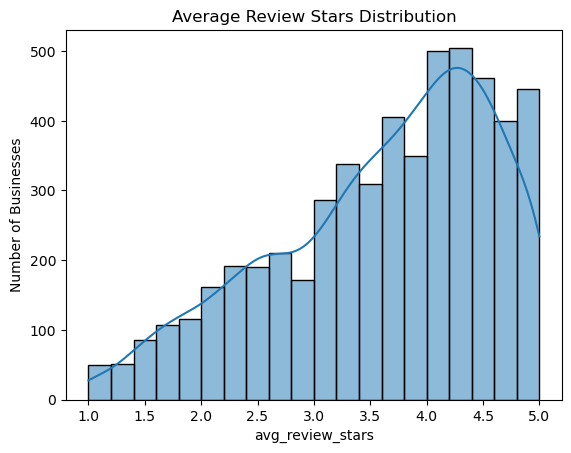

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(business_review_feature_df["avg_review_stars"], bins=20, kde=True)
plt.title("Average Review Stars Distribution")
plt.xlabel("avg_review_stars")
plt.ylabel("Number of Businesses")
plt.savefig("avg_review_stars_distribution.png")
plt.show()

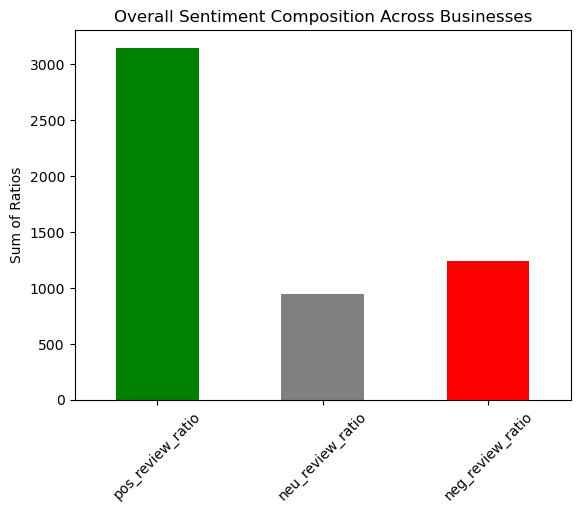

In [59]:
sentiment_ratios = business_review_feature_df[["pos_review_ratio", "neu_review_ratio", "neg_review_ratio"]]
sentiment_ratios.sum().plot(kind="bar", stacked=True, color=["green", "gray", "red"])
plt.title("Overall Sentiment Composition Across Businesses")
plt.xticks(rotation=45)
plt.ylabel("Sum of Ratios")
plt.savefig("overall_sentiment_composition.png")
plt.show()


In [66]:
# 去掉review_count
business_review_feature_df.drop(columns=["review_count"], inplace=True)

business_review_feature_df.to_csv(
    "business_review_Indianapolis_features.csv",
    index=False
)